### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

1. Has the network latency gone up since we switched internet service providers?
    - null hypothesis - the network latency stayed the same when switching internet service providers
        no significant change in latency
    - alternative hypothesis - the network latency has gone up/down since switching internet service providers
        latency is different (2 tailed)
        latency is greater than (1 tailed)
    - true positive - network latency stays the same when not switching providers
    - true negative - network latency goes up/down when switching providers
    - type 1 error - the network latency looks as though it has gone up/down when switching providers, but that is not the case. Latency has stayed the same, but we are still seeing it go up/down.
    - type 2 error - the network latency looks as though it stayed the same when switching providers, but it is actually not the case. Latency has actually gone up/down, but we are still seeing that it is the same.
    
- Is the website redesign any good? (are we optimizing for sales, service speed?)
    - null hypothesis - website redesign hasn't had changes
    - alternative hypothesis - website redesign is good/bad
    - true positive - getting good reviews on website redesign and the website redesign is actually good 
    - true negative - getting bad reviews on website redesign and the website redesign is actually bad
    - type 1 error - getting bad reviews on website redesign but website redesign is actually good
    - type 2 error - getting good reviews on website redesign but website redesign is actually bad
    
    
- Is our television ad driving more sales? (1-tailed test)
    - null hypothesis - tv ad is not having any effect on sales
    - alternative hypothesis - tv add has a positive/negative effect on sales
    - true positive - sales are up b/c tv ad driving sales
    - true negative - sales are down b/c tv ad has a negative effect on sales
    - type 1 error - sales are up/down but tv ad has no impact
    - type 2 error - sales are the same, but tv ad has had a positive/negative impact

In [46]:
import math
import statistics 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pydataset import data

### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
- A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
- A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
- Use a .05 level of significance.

What are we comparing?

- average time (numeric continuous values) to sell for two different groups (categories)

Form a hypothesis:

- $H_0$ = There is no difference in average time to sell at two offices
- $H_a$ = There is difference in average time to sell at two offices

Significance level $\alpha$ = 0.05

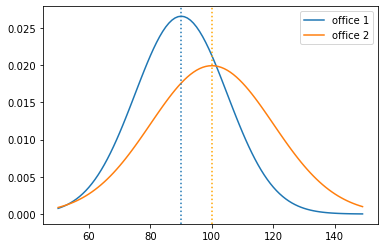

In [47]:
# Visualize two distribution:

x = np.arange(50,150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)


plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')
plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':', color = 'orange')


plt.legend()

In [4]:
#this is a 2-sample t-test b/c comparing the means of 2 subgroups
#this is also 2 tailed t-test b/c checking for any difference btwn the means (regardless of direction)

In [50]:
#Setup
null_hypothesis = "average time it takes to sell homes is the same for its two offices"
alternative_hypothesis = "average time it takes to sell homes is different for its two offices"
#confidence_level = .95
#alpha = 1 - confidence_level
alpha = .05

office1 = stats.norm(90, 15).rvs(10_000)
office2 = stats.norm(100, 20).rvs(10_000)

In [51]:
#.ttest_ind test of independence b/c 2 sample t-test 
t, p = stats.ttest_ind(office2, office1)

t, p

(39.71394351492517, 0.0)

In [52]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We accept that", alternative_hypothesis)
else:
    print("We failed to reject the hypothesis")

We reject the null hypothesis that average time it takes to sell homes is the same for its two offices
We accept that average time it takes to sell homes is different for its two offices


In [54]:
#solution:

#Using Scipy 
α = 0.05
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html

t, p = stats.ttest_ind_from_stats(100,20,50, 90,15,40)
t,p

(2.6252287036468456, 0.01020985244923939)

In [55]:
print(f'''
Because the p-value ({p}) is less than alpha value ({alpha}),we reject the null hypothesis''')


Because the p-value (0.01020985244923939) is less than alpha value (0.05),we reject the null hypothesis


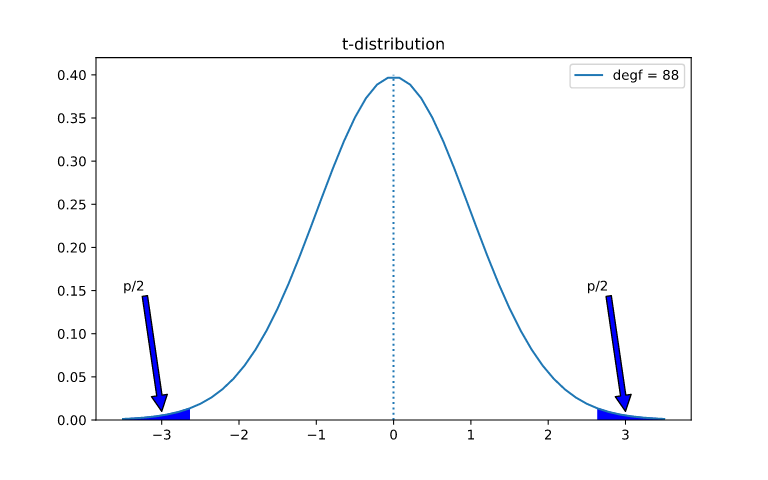

In [57]:
# Can be calculated in  python using the formula for two- 
# sample t-test

from math import sqrt

α = 0.05

# Sample means:
xbar1 = 90
xbar2 = 100

# Given sample size:
n1 = 40
n2 = 50

# given std deviations:
s1 = 15
s2 = 20


# Degrees of freedom
degf = n1 + n2 - 2

# Calculate pooled standard deviation:
s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2)/
           (n1 + n2 - 2))

# Calculate t-statistic value
t = (xbar2 - xbar1) / (s_p * sqrt(1 / n1 + 1 / n2))

print(f't = {t:.4}')

t = 2.625


In [58]:
#Calculate p value for calculated t-statistic
p = stats.t(degf).sf(t) * 2
print(f'p = {p:.3}')

p = 0.0102


### Load the mpg dataset and use it to answer the following questions:



In [9]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


Comparing fuel economy two different sub-groups (2-sample, 2-tailed t-test)

- $H_0$: there is no difference in fuel-efficiency in cars from 2008 vs 1999
- $H_a$: there is a difference in fuel-efficiency in cars from 2008 vs 1999

Calculate average fuel economy assuming 50% highway and 50% city driving

- Should I use arithmetic mean or harmonic mean for average mpg?
    - Arithmetic Mean: fe_am = (cty + hwy)/2
    - Harmonic Mean: fe_hm = 2/(1/cty + 1/hwy)

In [18]:
mpg["avg_fuel_efficiency"] = (mpg.hwy + mpg.cty) / 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [19]:
#2-sample t-test b/c comparing the means of 2 subgroups
#2 tailed t-test b/c checking for any diff (regardless of direction)

#Setup
null_hypothesis = "there is no difference in fuel-efficiency in cars from 2008 vs 1999"
alternative_hypothesis = "there is a difference in fuel-efficiency in cars from 2008 vs 1999"
confidence_level = .95
alpha = 1 - confidence_level

cars99 = mpg[mpg["year"] == 1999].avg_fuel_efficiency
cars08 = mpg[mpg["year"] == 2008].avg_fuel_efficiency

In [20]:
#.ttest_ind test of independence b/c 2 sample t-test 
t, p = stats.ttest_ind(cars99, cars08)

t, p

(0.21960177245940962, 0.8263744040323578)

In [21]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print(alternative_hypothesis)

We fail to reject the null hypothesis
there is a difference in fuel-efficiency in cars from 2008 vs 1999


In [59]:
#makes more sense to add harmonic mean 
#used for rate changes (ex: miles per gallon/per hr)
#i did arithmetic mean above, but doesn't mathematically make sense 
#b/c hwy and city miles not the same

#actual sol:
mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis =1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fuel_efficiency,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,19.809524


In [60]:
fe_2008 = mpg[mpg.year == 2008].avg_fe
fe_1999 = mpg[mpg.year == 1999].avg_fe

t, p = stats.ttest_ind(fe_2008, fe_1999)
t, p

(-0.3011962975077886, 0.7635345888327115)

In [61]:
print(f'''
Because p ({p:.3f}) > alpha (.05), we fail to reject the null\
 hypothesis that there is no difference in fuel-efficency in cars\
 from 2008 and 1999.
''')


Because p (0.764) > alpha (.05), we fail to reject the null hypothesis that there is no difference in fuel-efficency in cars from 2008 and 1999.



In [62]:
fe_2008.mean(), fe_1999.mean()


(19.488662986569054, 19.68238764869729)

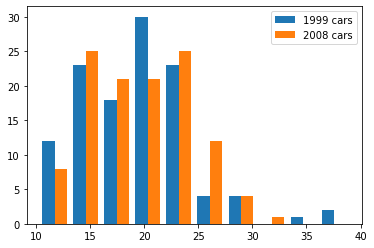

In [63]:
plt.hist([fe_1999, fe_2008], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

### Are compact cars more fuel-efficient than the average car?


Comparing fuel economy two different sub-groups (1-sample, 1-tailed t-test)

- $H_0$: There is no difference in fuel-efficiency between compact cars and the population average fuel-efficiency
- $H_a$: Compact cars are more fuel efficient than the average car

for $H_a$ to be true, **t > 0* and **p/2 < 0.05** 

In [31]:
#1-sample t-test b/c comparing the mean of a subgroup to the mean of a population
#1 tailed t-test b/c checking more fuel-efficiency

#Setup
null_hypothesis = "compact cars have the same fuel efficiency as the average car"
alternative_hypothesis = "there is a difference in fuel efficiency between compact car and the average car"
confidence_level = .95
alpha = 1 - confidence_level

average_car = mpg.avg_fuel_efficiency
compact_car = mpg[mpg["class"] == "compact"].avg_fuel_efficiency

In [44]:
#ttest_1samp function (#1 samp)
t, p = stats.ttest_1samp(compact_car, average_car.mean())
t, p

(7.896888573132535, 4.1985637943171336e-10)

In [75]:
if (p/2) < alpha and t > 0: #(p/2) b/c 1-tailed and (t>0) checking "more than" (not less than)
    print("We reject the null hypothesis that", null_hypothesis)
    print("We accept the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    

We reject the null hypothesis that average time it takes to sell homes is the same for its two offices
We accept the alternative hypothesis that average time it takes to sell homes is different for its two offices


In [64]:
#using harmonic mean:

fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
μ = mpg.avg_fe.mean()

t, p = stats.ttest_1samp(fe_compact, μ)
t, p

(7.512360093161354, 1.5617666348807727e-09)

In [65]:
print(f'''
Because p/2 ({p/2:.12f}) < alpha (.05), we reject the null hypothesis that there isno difference in fuel-efficiency between compact cars and the overall average.
''')


Because p/2 (0.000000000781) < alpha (.05), we reject the null hypothesis that there isno difference in fuel-efficiency between compact cars and the overall average.



### Do manual cars get better gas mileage than automatic cars?

In [34]:
#2-sample t-test b/c comparing the means of 2 subgroups
#1 tailed t-test b/c checking for better gas mileage

#Setup
null_hypothesis = "there is no difference in gas mileage for manual and automatic cars"
alternative_hypothesis = "there is a difference in gas mileage for manual and automatic cars"
confidence_level = .95
alpha = 1 - confidence_level

manual = mpg[mpg.trans.str.contains("manual")].avg_fuel_efficiency
automatic = mpg[mpg.trans.str.contains("auto")].avg_fuel_efficiency

In [45]:
#.ttest_ind test of independence b/c 2 sample t-test 
t, p = stats.ttest_ind(manual, automatic)
t, p

(4.593437735750014, 7.154374401145683e-06)

In [74]:
if (p/2) < alpha and t > 0: ##(p/2) b/c 1-tailed and (t>0) checking "more than" (not less than)
    print("We reject the null hypothesis that", null_hypothesis)
    print("We accept the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis that average time it takes to sell homes is the same for its two offices
We accept the alternative hypothesis that average time it takes to sell homes is different for its two offices


In [66]:
#using harmonic mean:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_fe

t, p = stats.ttest_ind(fe_manual, fe_auto)
t, p

(4.652577547151351, 5.510464610044005e-06)

In [67]:
print(f'''
Because p/2 ({p/2:.6f}) < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars
''')


Because p/2 (0.000003) < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars



In [68]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')

Text(0.5, 1.0, 'Is mileage different by transmission type?')

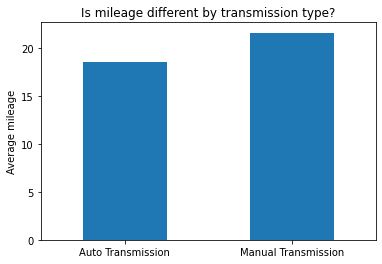

In [69]:
mpg.groupby('transmission_type').avg_fe.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Is mileage different by transmission type?')

### Bonus: Q1. Load “Cust_Churn_Telco.csv” data. Using this data answer the following questions:
CSV file can be found here —> 
https://classroom.google.com/c/MjI5NDAwNDI2NTg5/m/MjczODkyOTkxOTM0/details


In [73]:
telco= pd.read_csv("Copy of Cust_Churn_Telco - Cust_Churn_Telco.csv")
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Is the mean of monthly charges of customers who churn significantly higher than the mean across all customers?


In [79]:
#1-sample t-test b/c comparing the mean of a subgroup (cust churn) to the mean of a population(all cust)
#1 tailed t-test b/c checking for better gas mileage ( (p/2) < a and t>0 )

#Setup
null_hypothesis = "there is no difference in the monthly charges for customers who churn vs all customers"
alternative_hypothesis = "customers who churn have a different monthly charge than all customers"
confidence_level = .95
alpha = 1 - confidence_level



In [80]:
cust_churn = telco[telco.Churn == "Yes"]
cust_churn_monthly_avg = cust_churn.MonthlyCharges.mean()
all_cust_monthly_avg = telco.MonthlyCharges.mean()

In [81]:
#.ttest_1samp function (b/c 1-sample t-test)
t, p = stats.ttest_1samp(cust_churn_monthly_avg, all_cust_monthly_avg)
t, p

(nan, nan)

In [ ]:
if (p/2) < a and t > 0:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We accept the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")

### Is the mean of monthly charges of customers who churn significantly higher than the mean of those who don't churn?


### Bonus: Q2. Load Iris dataset from pydataset or sns. Using this data answer the following questions:


### Is the sepal length significantly different between Veriscolor and Virginica?


### Is the sepal length significantly different between Setosa and Virginica?